# SAINT-GALLEN STARTHACK 

# Imports and Analysis

In [480]:
import pandas as pd, numpy as np
import matplotlib as plt
import sklearn.feature_selection 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
#import seaborn as sns
%matplotlib inline

In [481]:
dataPeople = pd.read_csv('eigenschaften-sozialhilfeempfaenger-stadt-st-gallen.csv',delimiter=";")
print(dataPeople.shape)
dataPeople.head()

(4711, 17)


,id,Dossier structure,Dossier type,Product of last dossier version,Personal household (support unit),Persons in household total,Person category,Marital status,Nationality categories,In CH since birth,Age categories,Employment situation,Degree of employment,Part-time reason,Highest completed education,Trained profession category,last job category
0,id01115,Sozialhilfe,Ausländer/innen,Sozialhilfeleistung,1,Einzelhaushalt,Alleinstehend,geschieden,EU / EFTA,False,46-55,vorübergehend arbeitsunfähig,NaN,NaN,nicht feststellbar,kein | keine,Verkaufskräfte
1,id03188,Sozialhilfe,Ausländer/innen,Sozialhilfeleistung,1,Einzelhaushalt,Alleinstehend,ledig,EU / EFTA,True,36-45,Dauerinvalidität,NaN,NaN,Anlehre,Berufe im Bereich personenbezogener Dienstleis...,Hilfsarbeiter in der Land- und Forstwirtschaft...
2,id02902,Sozialhilfe,Ausländer/innen,Sozialhilfeleistung,1,Mehrfachhaushalt (2-3),Alleinstehend,ledig,EU / EFTA,True,36-45,vorübergehend arbeitsunfähig,NaN,NaN,Anlehre,Bau- und Ausbaufachkräfte sowie verwandte Beru...,Bau- und Ausbaufachkräfte sowie verwandte Beru...
3,id04640,Sozialhilfe,Ausländer/innen,Sozialhilfeleistung,1,Einzelhaushalt,Alleinstehend,geschieden,EU / EFTA,False,56-65,Arbeit auf Abruf,Eine Teilzeitstelle (bis 49%),keine Vollzeitstelle,nicht feststellbar,kein | keine,Reinigungspersonal und Hilfskräfte
4,id03380,Sozialhilfe,Ausländer/innen,Sozialhilfeleistung,1,Einzelhaushalt,Alleinstehend,ledig,EU / EFTA,True,36-45,"ohne Arbeit, nicht beim Arbeitsamt gemeldet",NaN,NaN,obligatorische Schule,kein | keine,Verkaufskräfte


In [482]:
print('The data types are: ')
dataPeople.dtypes


The data types are: 


id                                   object
Dossier structure                    object
Dossier type                         object
Product of last dossier version      object
Personal household (support unit)    object
Persons in household total           object
Person category                      object
Marital status                       object
Nationality categories               object
In CH since birth                      bool
Age categories                       object
Employment situation                 object
Degree of employment                 object
Part-time reason                     object
Highest completed education          object
Trained profession category          object
last job category                    object
dtype: object

In [483]:
dataPeople.describe(include=['object'])

,id,Dossier structure,Dossier type,Product of last dossier version,Personal household (support unit),Persons in household total,Person category,Marital status,Nationality categories,Age categories,Employment situation,Degree of employment,Part-time reason,Highest completed education,Trained profession category,last job category
count,4711,4711,4711,4711,4711,4711,4711,4709,4711,4711,4459,955,625,4556,4509,4374
unique,4711,1,7,2,4,3,4,4,8,5,22,6,6,8,42,45
top,id01115,Sozialhilfe,Inländer/innen,Sozialhilfeleistung,1,Einzelhaushalt,Alleinstehend,ledig,Schweiz,26-35,"ohne Arbeit, nicht beim Arbeitsamt gemeldet",Eine Teilzeitstelle (bis 49%),keine Vollzeitstelle,obligatorische Schule,kein | keine,kein | keine
freq,1,4711,2317,4443,3433,2359,3431,2470,2408,1236,1391,382,413,2208,2595,611


In [484]:
#target = data['Product of last dossier version']
#del data['Product of last dossier version']
#data['target'] = target

In [485]:
for feature in dataPeople.columns:
    print(feature,' diff values :',len(dataPeople[feature].unique()),' first:',dataPeople[feature][0])

#feature Dossier structure has only one value so we delete it

id  diff values : 4711  first: id01115
Dossier structure  diff values : 1  first: Sozialhilfe
Dossier type  diff values : 7  first: Ausländer/innen
Product of last dossier version  diff values : 2  first: Sozialhilfeleistung
Personal household (support unit)  diff values : 4  first: 1
Persons in household total  diff values : 3  first: Einzelhaushalt
Person category  diff values : 4  first: Alleinstehend
Marital status  diff values : 5  first: geschieden
Nationality categories  diff values : 8  first: EU / EFTA
In CH since birth  diff values : 2  first: False
Age categories  diff values : 5  first: 46-55
Employment situation  diff values : 23  first: vorübergehend arbeitsunfähig
Degree of employment  diff values : 7  first: nan
Part-time reason  diff values : 7  first: nan
Highest completed education  diff values : 9  first: nicht feststellbar
Trained profession category  diff values : 43  first: kein | keine
last job category  diff values : 46  first: Verkaufskräfte


In [486]:
del dataPeople['Dossier structure']

In [487]:
probs = dataPeople['Product of last dossier version'].value_counts(normalize=True)
print(probs)

Sozialhilfeleistung    0.943112
Rückerstattung         0.056888
Name: Product of last dossier version, dtype: float64


In [488]:
dataDossier = pd.read_csv('verlaufe-sozialhilfe-ruckerstattungen-stadt-stgallen.csv',delimiter=";")
dataDossier.head()

,ID,Dossier von,Dossier bis,Produkt
0,id02270,2021-08,2021-12,Sozialhilfeleistung
1,id03410,2019-08,2021-01,Sozialhilfeleistung
2,id01383,2019-02,2019-05,Sozialhilfeleistung
3,id02268,2019-07,2021-12,Sozialhilfeleistung
4,id04133,2019-07,2020-02,Sozialhilfeleistung


# Create Target Value

In [501]:
pendingDocuments = dataDossier['ID'][dataDossier['Dossier bis'].isna()].sort_values()

dataPeople.loc[(dataPeople['Product of last dossier version'] == 'Rückerstattung') & (dataPeople['id'].isin(pendingDocuments)) , 'target'] = 'Rembursing'
dataPeople.loc[(dataPeople['Product of last dossier version'] == 'Rückerstattung') & ~(dataPeople['id'].isin(pendingDocuments)) , 'target'] = 'Finish Reimbursing'
dataPeople.loc[(dataPeople['Product of last dossier version'] == 'Sozialhilfeleistung') & (dataPeople['id'].isin(pendingDocuments)) , 'target'] = 'Help pending'
dataPeople.loc[(dataPeople['Product of last dossier version'] == 'Sozialhilfeleistung') & ~(dataPeople['id'].isin(pendingDocuments)) , 'target'] = 'Finish help'

#test should have R P F F P
print("id00001 status:",dataPeople.loc[dataPeople['id'] == 'id00001']['target'])
print("id00002 status:",dataPeople.loc[dataPeople['id'] == 'id00002']['target'])
print("id00003 status:",dataPeople.loc[dataPeople['id'] == 'id00003']['target'])
print("id00004 status:",dataPeople.loc[dataPeople['id'] == 'id00004']['target'])
print("id00005 status:",dataPeople.loc[dataPeople['id'] == 'id00005']['target'])

id00001 status: 3966    Finish Reimbursing
Name: target, dtype: object
id00002 status: 502    Help pending
Name: target, dtype: object
id00003 status: 2930    Finish help
Name: target, dtype: object
id00004 status: 357    Finish help
Name: target, dtype: object
id00005 status: 2647    Help pending
Name: target, dtype: object


In [490]:
probs = dataPeople['target'].value_counts()
print(probs)


#TODO separer F en plus que 1an qu'ils ont pas remboursé et ceux qui vienne de remboursé

Finish help           2983
Help pending          1460
Finish Reimbursing     162
Rembursing             106
Name: target, dtype: int64


# Feature Selection


## Prepare data for feature selection

https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [491]:
dataPeople.head()

,id,Dossier type,Product of last dossier version,Personal household (support unit),Persons in household total,Person category,Marital status,Nationality categories,In CH since birth,Age categories,Employment situation,Degree of employment,Part-time reason,Highest completed education,Trained profession category,last job category,target
0,id01115,Ausländer/innen,Sozialhilfeleistung,1,Einzelhaushalt,Alleinstehend,geschieden,EU / EFTA,False,46-55,vorübergehend arbeitsunfähig,NaN,NaN,nicht feststellbar,kein | keine,Verkaufskräfte,Finish help
1,id03188,Ausländer/innen,Sozialhilfeleistung,1,Einzelhaushalt,Alleinstehend,ledig,EU / EFTA,True,36-45,Dauerinvalidität,NaN,NaN,Anlehre,Berufe im Bereich personenbezogener Dienstleis...,Hilfsarbeiter in der Land- und Forstwirtschaft...,Finish help
2,id02902,Ausländer/innen,Sozialhilfeleistung,1,Mehrfachhaushalt (2-3),Alleinstehend,ledig,EU / EFTA,True,36-45,vorübergehend arbeitsunfähig,NaN,NaN,Anlehre,Bau- und Ausbaufachkräfte sowie verwandte Beru...,Bau- und Ausbaufachkräfte sowie verwandte Beru...,Help pending
3,id04640,Ausländer/innen,Sozialhilfeleistung,1,Einzelhaushalt,Alleinstehend,geschieden,EU / EFTA,False,56-65,Arbeit auf Abruf,Eine Teilzeitstelle (bis 49%),keine Vollzeitstelle,nicht feststellbar,kein | keine,Reinigungspersonal und Hilfskräfte,Help pending
4,id03380,Ausländer/innen,Sozialhilfeleistung,1,Einzelhaushalt,Alleinstehend,ledig,EU / EFTA,True,36-45,"ohne Arbeit, nicht beim Arbeitsamt gemeldet",NaN,NaN,obligatorische Schule,kein | keine,Verkaufskräfte,Finish help


In [492]:
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
#prepare data
Allcolumns = ['target','id','Dossier type','Product of last dossier version','Personal household (support unit)','Persons in household total','Person category','Marital status','Nationality categories','In CH since birth','Age categories','Employment situation','Degree of employment','Part-time reason','Highest completed education','Trained profession category','last job category']
dropColumns = ['target','id','Product of last dossier version']
keptColumns = list(set(Allcolumns)-set(dropColumns))
print('dropColumns:',dropColumns)
print('keptColumns',keptColumns)
#print(dataPeople.columns)

#Replace NaN with string NAN
dataNaN = dataPeople.copy()
for f in dataNaN.columns:
    dataNaN[f].fillna(value='NAN', inplace=True)

print('dataNaN:',dataNaN[:1])

X = dataNaN.drop(columns=dropColumns) #remove id bc not a categorical value was used to create the target
y = dataPeople['target']
#print('X:',X[:1])
#print('y:',y[:1])
print(X.columns)

    

dropColumns: ['target', 'id', 'Product of last dossier version']
keptColumns ['In CH since birth', 'Trained profession category', 'Marital status', 'Employment situation', 'Person category', 'Degree of employment', 'last job category', 'Part-time reason', 'Persons in household total', 'Personal household (support unit)', 'Nationality categories', 'Highest completed education', 'Age categories', 'Dossier type']
dataNaN:         id     Dossier type Product of last dossier version  \
0  id01115  Ausländer/innen             Sozialhilfeleistung   

  Personal household (support unit) Persons in household total  \
0                                 1             Einzelhaushalt   

  Person category Marital status Nationality categories  In CH since birth  \
0   Alleinstehend     geschieden              EU / EFTA              False   

  Age categories          Employment situation Degree of employment  \
0          46-55  vorübergehend arbeitsunfähig                  NAN   

  Part-time reaso

In [493]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)


print('X_train_enc:',X_train_enc[:5])
print('X_test_enc:',X_test_enc[:5])
print('y_train_enc:',y_train_enc[:5])
print('y_test_enc:',y_test_enc[:5])



X_train_enc: [[ 0.  3.  2.  1.  3.  1.  0.  4.  2.  0.  6.  7. 42. 38.]
 [ 4.  2.  1.  1.  3.  5.  1.  1.  1.  4.  2.  5. 17.  0.]
 [ 0.  0.  0.  0.  1.  2.  0.  3. 18.  3.  2.  8. 42.  4.]
 [ 0.  0.  0.  0.  2.  2.  1.  0. 16.  3.  2.  8. 42. 41.]
 [ 0.  0.  1.  0.  2.  2.  0.  2. 19.  3.  2.  1.  2.  3.]]
X_test_enc: [[ 0.  0.  0.  0.  1.  2.  0.  4. 20.  3.  2.  8.  7.  8.]
 [ 2.  0.  0.  0.  1.  5.  0.  4.  6.  3.  2.  8. 33. 44.]
 [ 1.  0.  1.  0.  2.  0.  0.  0.  2.  0.  6.  8. 42.  0.]
 [ 0.  2.  1.  1.  3.  1.  0.  2. 19.  3.  2.  7. 42. 26.]
 [ 2.  0.  0.  0.  3.  5.  0.  2.  9.  3.  2.  3. 33. 35.]]
y_train_enc: [3 3 1 1 1]
y_test_enc: [1 1 1 0 1]


## Chi test feature selection

In [494]:
#chi test feature selection
def select_features_chi(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features_chi(X_train_enc, y_train_enc, X_test_enc)
order = np.argsort(fs.scores_)[::-1]
chi2OrderedScores = fs.scores_[np.array(order)]
print('orderedScores:',chi2OrderedScores)
chi2OrderedFeatures = np.array(X.columns)[np.array(order)]
print('orderedFeatures:',chi2OrderedFeatures)

orderedScores: [120.25960078 114.59228813  52.96655306  45.34534154  42.03986057
  37.63895421  28.8892318   22.42324683  18.74327471   6.68036747
   5.87176948   5.5397287    3.53576703   3.52541693]
orderedFeatures: ['Trained profession category' 'Employment situation'
 'Nationality categories' 'Person category' 'In CH since birth'
 'Personal household (support unit)' 'Highest completed education'
 'Dossier type' 'Age categories' 'Degree of employment'
 'last job category' 'Persons in household total' 'Marital status'
 'Part-time reason']


Feature [Trained profession category] 0: 120.259601
Feature [Employment situation] 1: 114.592288
Feature [Nationality categories] 2: 52.966553
Feature [Person category] 3: 45.345342
Feature [In CH since birth] 4: 42.039861
Feature [Personal household (support unit)] 5: 37.638954
Feature [Highest completed education] 6: 28.889232
Feature [Dossier type] 7: 22.423247
Feature [Age categories] 8: 18.743275
Feature [Degree of employment] 9: 6.680367
Feature [last job category] 10: 5.871769
Feature [Persons in household total] 11: 5.539729
Feature [Marital status] 12: 3.535767
Feature [Part-time reason] 13: 3.525417


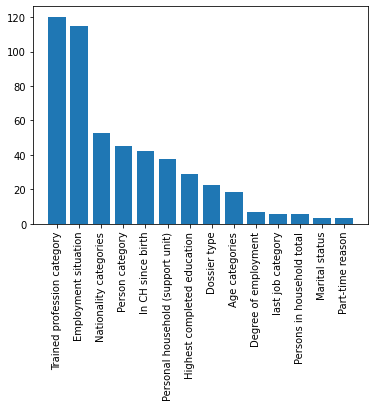

In [495]:
# what are scores for the features
for i in range(len(chi2OrderedScores)):
	print('Feature [%s] %d: %f' % (chi2OrderedFeatures[i],i, chi2OrderedScores[i]))
# plot the scores
pyplot.xticks(np.arange(len(chi2OrderedScores)),chi2OrderedFeatures,rotation='vertical')
pyplot.bar(chi2OrderedFeatures,chi2OrderedScores)
pyplot.show()

## Mutual Info Classic if

orderedScores: [0.03699897 0.02907851 0.01368445 0.01202143 0.01077318 0.00950103
 0.0092456  0.00904609 0.00610366 0.00555712 0.00141027 0.
 0.         0.        ]
orderedFeatures: ['Employment situation' 'Highest completed education'
 'Nationality categories' 'In CH since birth'
 'Personal household (support unit)' 'Part-time reason'
 'Trained profession category' 'Persons in household total'
 'Person category' 'Age categories' 'last job category'
 'Degree of employment' 'Marital status' 'Dossier type']
Feature [Employment situation] 0: 0.036999
Feature [Highest completed education] 1: 0.029079
Feature [Nationality categories] 2: 0.013684
Feature [In CH since birth] 3: 0.012021
Feature [Personal household (support unit)] 4: 0.010773
Feature [Part-time reason] 5: 0.009501
Feature [Trained profession category] 6: 0.009246
Feature [Persons in household total] 7: 0.009046
Feature [Person category] 8: 0.006104
Feature [Age categories] 9: 0.005557
Feature [last job category] 10: 0.001410
F

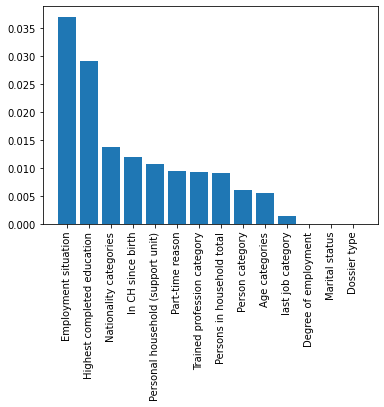

In [496]:
# feature selection
def select_features_mutual_info(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features_mutual_info(X_train_enc, y_train_enc, X_test_enc)
#print(fs.scores_)

order = np.argsort(fs.scores_)[::-1]
mutualInfoOrderedScores = fs.scores_[np.array(order)]
print('orderedScores:',mutualInfoOrderedScores)
mutualInfoOrderedFeatures = np.array(X.columns)[np.array(order)]
print('orderedFeatures:',mutualInfoOrderedFeatures)

# what are scores for the features
for i in range(len(mutualInfoOrderedScores)):
	print('Feature [%s] %d: %f' % (mutualInfoOrderedFeatures[i],i, mutualInfoOrderedScores[i]))
# plot the scores
pyplot.xticks(np.arange(len(mutualInfoOrderedScores)),mutualInfoOrderedFeatures,rotation='vertical')
pyplot.bar(mutualInfoOrderedFeatures,mutualInfoOrderedScores)
pyplot.show()

## ANOVA

orderedScores: [24.26047196 17.41555944 11.21210315  8.64018661  7.51521512  7.38021353
  6.85156671  6.4884296   5.21849072  4.78479894  4.50662339  2.30658286
  1.89819223  0.20454975]
orderedFeatures: ['In CH since birth' 'Nationality categories' 'Employment situation'
 'Age categories' 'Person category' 'Personal household (support unit)'
 'Degree of employment' 'Dossier type' 'Trained profession category'
 'Marital status' 'Highest completed education'
 'Persons in household total' 'Part-time reason' 'last job category']
Feature [In CH since birth] 0: 24.260472
Feature [Nationality categories] 1: 17.415559
Feature [Employment situation] 2: 11.212103
Feature [Age categories] 3: 8.640187
Feature [Person category] 4: 7.515215
Feature [Personal household (support unit)] 5: 7.380214
Feature [Degree of employment] 6: 6.851567
Feature [Dossier type] 7: 6.488430
Feature [Trained profession category] 8: 5.218491
Feature [Marital status] 9: 4.784799
Feature [Highest completed education] 10:

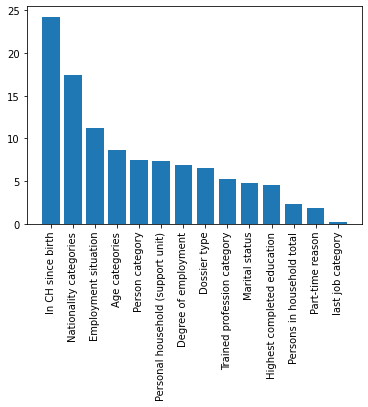

In [497]:
# feature selection
def select_features_ANOVA(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features_ANOVA(X_train_enc, y_train_enc, X_test_enc)
#print(fs.scores_)

order = np.argsort(fs.scores_)[::-1]
AnovaOrderedScores = fs.scores_[np.array(order)]
print('orderedScores:',AnovaOrderedScores)
AnovaOrderedFeatures = np.array(X.columns)[np.array(order)]
print('orderedFeatures:',AnovaOrderedFeatures)

# what are scores for the features
for i in range(len(AnovaOrderedScores)):
	print('Feature [%s] %d: %f' % (AnovaOrderedFeatures[i],i, AnovaOrderedScores[i]))
# plot the scores
pyplot.xticks(np.arange(len(AnovaOrderedScores)),AnovaOrderedFeatures,rotation='vertical')
pyplot.bar(AnovaOrderedFeatures,AnovaOrderedScores)
pyplot.show()

## Remove unsignificant features

In [498]:
nWorsts = 6
print('Worst %i in each measurements:'%nWorsts)
worstChi2 = chi2OrderedFeatures[len((chi2OrderedFeatures))-nWorsts:]
worstMutualInfo = mutualInfoOrderedFeatures[len((mutualInfoOrderedFeatures))-nWorsts:]
worstAnova = AnovaOrderedFeatures[len((AnovaOrderedFeatures))-nWorsts:]
print('     chi2:',worstChi2)
print('     MutualInfo:',worstMutualInfo)
print('     ANOVA:',worstAnova)

commonWorsts = list(set(worstChi2) & set(worstMutualInfo) & set(worstAnova))
print('commonWorsts:',commonWorsts)


Worst 6 in each measurements:
     chi2: ['Age categories' 'Degree of employment' 'last job category'
 'Persons in household total' 'Marital status' 'Part-time reason']
     MutualInfo: ['Person category' 'Age categories' 'last job category'
 'Degree of employment' 'Marital status' 'Dossier type']
     ANOVA: ['Trained profession category' 'Marital status'
 'Highest completed education' 'Persons in household total'
 'Part-time reason' 'last job category']
commonWorsts: ['last job category', 'Marital status']


# Different profiles 

## Kmodes: Clustering to find the differents profiles

In [521]:
from kmodes.kmodes import KModes


def saveClusterToCsv(nbClusters):
    # random categorical data
    subsetColumns = dataNaN.drop(columns={'target','id','Product of last dossier version'},axis=1)
    dataXnan = subsetColumns.values

    km = KModes(n_clusters=nbClusters, init='Huang', n_init=5, verbose=0)

    fitclusters = km.fit_predict(dataXnan)

    clusterCentroid = pd.DataFrame(km.cluster_centroids_)
    clusterCentroid.columns = subsetColumns.columns
    clusterCentroid.to_csv("clusterCentroid"+str(nbClusters)+".csv") 

    return clusterCentroid



In [526]:
clustersCentroids3 = saveClusterToCsv(3)

In [524]:
clustersCentroids5 = saveClusterToCsv(3)

In [527]:
clustersCentroids7 = saveClusterToCsv(7)

In [528]:
clustersCentroids10 = saveClusterToCsv(10)

## Predict for each profile